In [3]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import yfinance as yf  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [4]:
ticker = 'PG' 
data = pd.DataFrame()
# data[ticker] = wb.DataReader(ticker, data_source='iex', start='2015-1-1')['close']
data[ticker] = yf.download(ticker, start='2015-01-01')['Close']

log_returns = np.log(1 + data.pct_change())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13780\296700836.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker] = yf.download(ticker, start='2015-01-01')['Close']
[*********************100%***********************]  1 of 1 completed


In [5]:
log_returns.tail()

,PG
Date,
2025-10-29,-0.017326
2025-10-30,0.005430
2025-10-31,0.005268
2025-11-03,-0.015751
2025-11-04,-0.005759


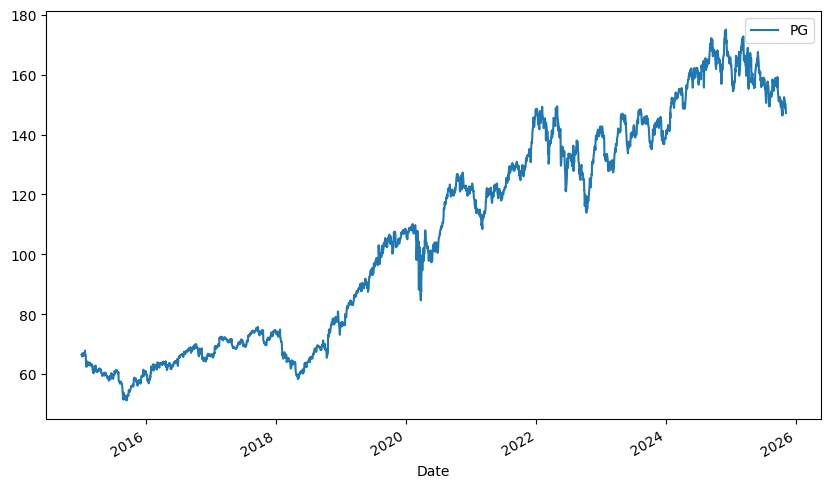

In [6]:
data.plot(figsize=(10, 6));

<Axes: xlabel='Date'>

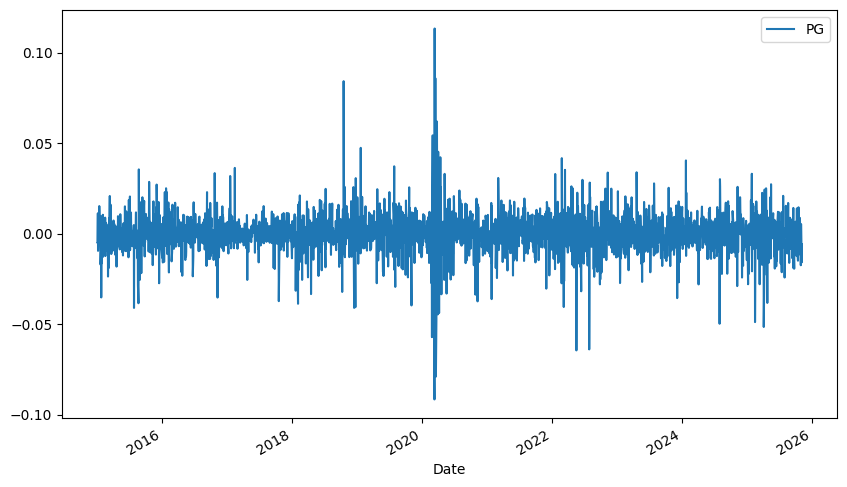

In [7]:
log_returns.plot(figsize = (10, 6))

In [8]:
u = log_returns.mean()
u

PG    0.000291
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000136
dtype: float64

In [10]:
drift = u - (0.5 * var)
drift

PG    0.000223
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011658
dtype: float64

******

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00022336])

In [15]:
drift.values

array([0.00022336])

In [16]:
stdev.values

array([0.01165791])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[0.93943283, 0.96957186],
       [0.33747429, 0.06858158],
       [0.63750718, 0.27872605],
       [0.78681549, 0.15775259],
       [0.29921863, 0.95285196],
       [0.44665526, 0.30560006],
       [0.43089812, 0.78885604],
       [0.98498556, 0.9700493 ],
       [0.07349839, 0.766107  ],
       [0.70900837, 0.35711485]])

In [19]:
norm.ppf(x)

array([[ 1.55002988,  1.87453826],
       [-0.41936611, -1.48643856],
       [ 0.35180349, -0.58663019],
       [ 0.79542036, -1.00373744],
       [-0.52664913,  1.67315861],
       [-0.13411642, -0.50836112],
       [-0.17408807,  0.80245826],
       [ 2.16970928,  1.8815187 ],
       [-1.45022144,  0.7260861 ],
       [ 0.5504901 , -0.36618141]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.5236016 , -1.04237892],
       [-1.75623932,  0.58049698],
       [-0.17851584, -1.03479207],
       [ 0.54740363,  1.01159826],
       [ 2.01021348,  1.97111614],
       [ 1.01938343, -0.33888463],
       [-0.04756912,  0.53875895],
       [ 1.12188618, -0.94570743],
       [-2.17999413, -0.85477915],
       [ 0.0196722 ,  0.26712791]])

In [21]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [22]:
daily_returns

array([[1.01995916, 0.97669995, 0.98261304, ..., 1.02673415, 1.00048302,
        1.00010518],
       [1.01300141, 1.00304087, 1.00990063, ..., 1.00723954, 0.98818178,
        0.99749989],
       [0.98948117, 1.00249737, 0.99984582, ..., 1.00226005, 1.00882163,
        1.00854211],
       ...,
       [1.00496103, 1.00516419, 0.9951239 , ..., 0.98639496, 1.01638682,
        0.99194656],
       [1.00255809, 0.97471179, 0.98134566, ..., 0.99287075, 1.01355015,
        1.0111143 ],
       [0.98464787, 0.999486  , 0.99582047, ..., 1.01657256, 1.01309578,
        0.99295915]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [23]:
S0 = data.iloc[-1]
S0

PG    147.169998
Name: 2025-11-04 00:00:00, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
price_list[0] = S0
price_list

array([[147.16999817, 147.16999817, 147.16999817, ..., 147.16999817,
        147.16999817, 147.16999817],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [28]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [29]:
price_list

array([[147.16999817, 147.16999817, 147.16999817, ..., 147.16999817,
        147.16999817, 147.16999817],
       [149.0834163 , 147.61752254, 148.62707453, ..., 148.23544063,
        145.43071127, 146.80205691],
       [147.51523391, 147.98617794, 148.60415871, ..., 148.57046085,
        146.71364665, 148.05605576],
       ...,
       [178.45157593, 196.89357071, 168.65403061, ..., 220.50102627,
        280.37861985, 211.45652143],
       [178.90807072, 191.91448381, 165.50790047, ..., 218.92901882,
        284.1777918 , 213.80671243],
       [176.16145057, 191.81584005, 164.81615482, ..., 222.55723411,
        287.89932141, 212.30133044]])

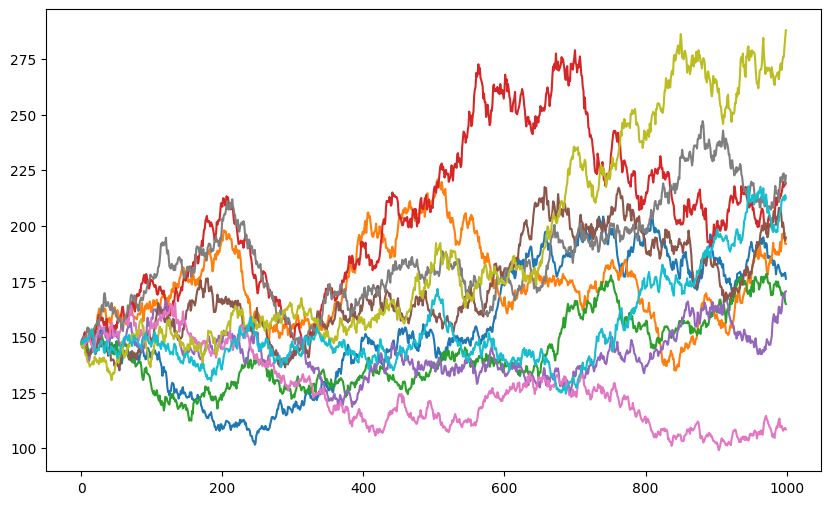

In [30]:
plt.figure(figsize=(10,6))
plt.plot(price_list);